<a href="https://colab.research.google.com/github/MehmetCanYildirim/Projects/blob/main/CNN_model_for_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 70,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

This project is the solution for a classification problem by using Convolutional Neural Network (CNN). At the end of the project, the classification process will be for 10 class.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, MaxPool2D, Dropout, Activation
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train, X_test = X_train/ 255.0, X_test/255.0

In [5]:
a = []
b = []

for j in range(len(y_train)):
  a.append(to_categorical(y_train[j],num_classes=10))
y_train = np.array(a)

for i in range(len(y_test)):
  b.append(to_categorical(y_test[i],num_classes=10))
y_test = np.array(b)

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000,28,28,1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, batch_size=256, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
235/235 [==============================] - 76s 318ms/step - loss: 0.2679 - accuracy: 0.9210 - val_loss: 0.0724 - val_accuracy: 0.9770
Epoch 2/5
235/235 [==============================] - 74s 315ms/step - loss: 0.0688 - accuracy: 0.9785 - val_loss: 0.0486 - val_accuracy: 0.9851
Epoch 3/5
235/235 [==============================] - 74s 314ms/step - loss: 0.0488 - accuracy: 0.9854 - val_loss: 0.0485 - val_accuracy: 0.9850
Epoch 4/5
235/235 [==============================] - 74s 313ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0374 - val_accuracy: 0.9876
Epoch 5/5
235/235 [==============================] - 74s 314ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0368 - val_accuracy: 0.9887


(0.5, 1.0)

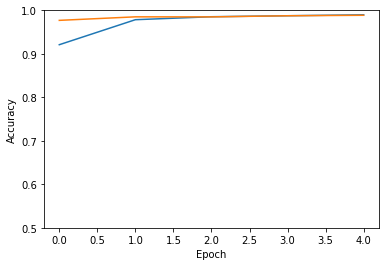

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])


In [12]:
results = model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 3s 34ms/step - loss: 0.0368 - accuracy: 0.9887


In [13]:
X_test[10].shape

(28, 28, 1)

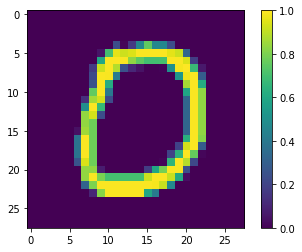

In [14]:
plt.figure()
plt.imshow(X_test[10].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()


In [15]:
prediction = model.predict(np.array([X_test[10]]))
np.argmax(prediction)

0